# Hodgkin&Huxley model

Author: Dmitrii Smirnov, MIPT    
Email: dmitrii.smirnov@phystech.edu

In [347]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np

In [348]:
plt.style.use('seaborn-darkgrid')
plt.rcParams["font.family"] = "serif"

In [349]:
C      = 1       #uF/cm2
gNa    = 120.    #mS/cm2
gK     = 36.     #mS/cm2
gL     = 0.3     #mS/cm2
VNa    = 115     #mV
VK     = -12     #mV
VL     = 10.613  #mV
V_rest = 0.      #mV

In [359]:
Time   = 70      # ms
dt     = 0.02    # ms

In [360]:
def initial_m_n_h(V):
    alpha_m = 0.1*(25-V)/(np.exp((25-V)/10)-1)  if V!=25 else 1
    beta_m  = 4*np.exp(-V/18)
    alpha_n = 0.01*(10-V)/(np.exp((10-V)/10)-1) if V!=10 else 0.1
    beta_n  = 0.125*np.exp(-V/80)
    alpha_h = 0.07*np.exp(-V/20)
    beta_h  = 1./(np.exp((30-V)/10)+1)
    
    n_inf = alpha_n/(alpha_n+beta_n)
    m_inf = alpha_m/(alpha_m+beta_m)
    h_inf = alpha_h/(alpha_h+beta_h)
    
    return n_inf, h_inf, m_inf

In [361]:
def m(V, m_i):
    alpha_m = 0.1*(25-V)/(np.exp((25-V)/10)-1) if V!=25 else 1
    beta_m  = 4*np.exp(-V/18)
    return m_i + dt*(alpha_m*(1-m_i)-beta_m*m_i)

In [362]:
def n(V, n_i):
    alpha_n = 0.01*(10-V)/(np.exp((10-V)/10)-1) if V!=10 else 0.1
    beta_n  = 0.125*np.exp(-V/80)
    return n_i + dt*(alpha_n*(1-n_i)-beta_n*n_i)

In [363]:
def h(V, h_i):
    alpha_h = 0.07*np.exp(-V/20)
    beta_h  = 1./(np.exp((30-V)/10)+1)
    return h_i + dt*(alpha_h*(1-h_i)-beta_h*h_i)

In [364]:
def membrane_potential(V, n_i, h_i, m_i, t):
    IK = gK*(V-VK)*n_i**4 
    INa = gNa*(V-VNa)*h_i*(m_i**3)
    IL = gL*(V-VL)
    if t > 2 and t < 60:
        Istim = -8
    else:
        Istim = 0
    return V - dt*(IK + INa + IL + Istim)/C  

In [365]:
n_i, h_i, m_i = initial_m_n_h(V_rest)
output = [V_rest]

V = V_rest
time_list = np.arange(0, Time, dt)
for t in time_list[1:]:
    m_next, n_next, h_next = m(V, m_i), n(V, n_i), h(V, h_i)
    V = membrane_potential(V, n_i, h_i, m_i, t)
    n_i, h_i, m_i = n_next, h_next, m_next
    output.append(V)

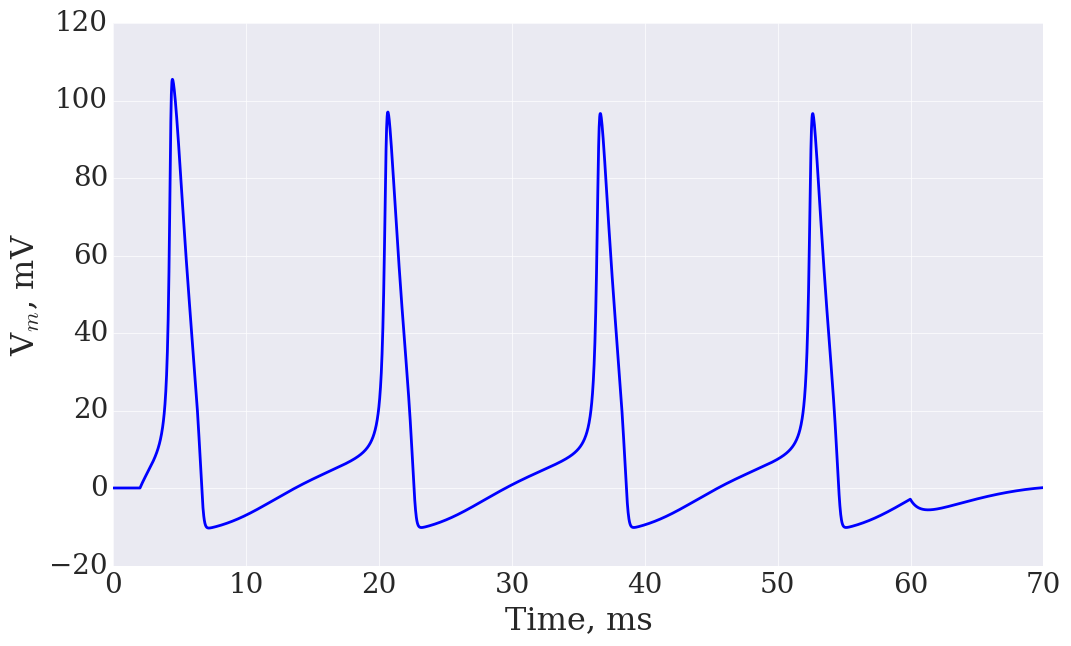

In [366]:
rcParams.update({'font.size': 20})
plt.figure(figsize=(12,7))

plt.plot(time_list, output, linewidth = 2.)
plt.xlabel('Time, ms', fontsize=23)
plt.ylabel('V$_m$, mV', fontsize=23)

plt.savefig('MembranePotential.png', dpi = 200)
plt.show()

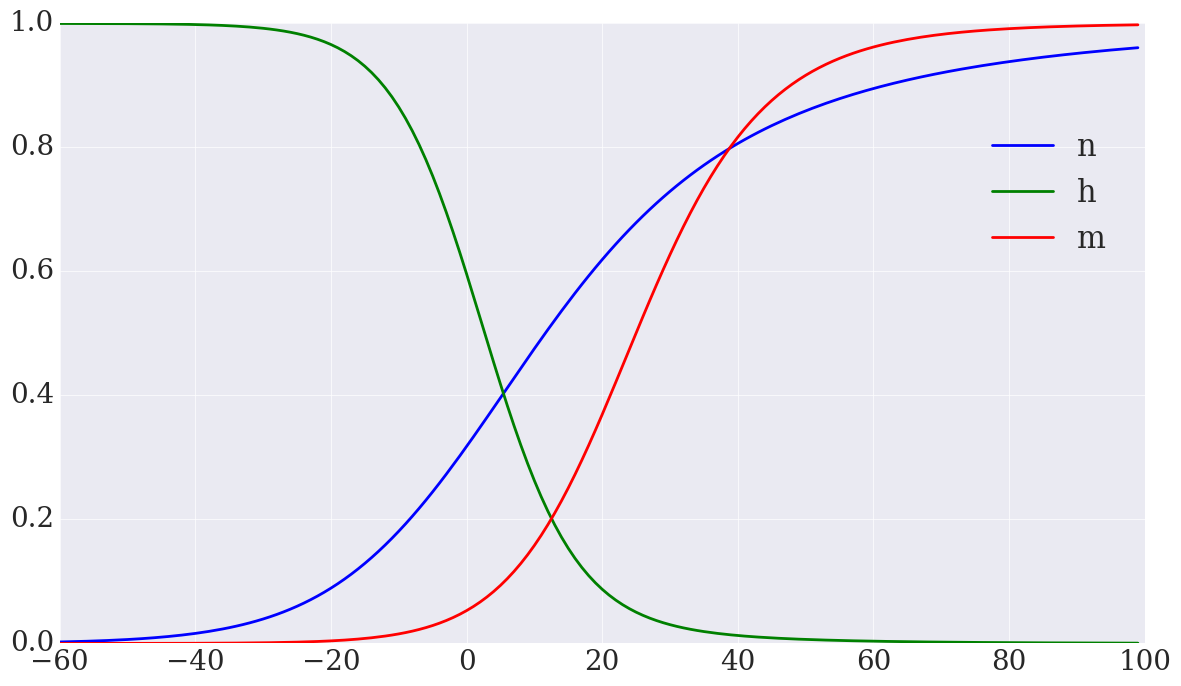

In [367]:
rcParams.update({'font.size': 20})
plt.figure(figsize=(14,8))

potentials = np.arange(-60, 100)
nhm = np.array([])
for v in potentials:
    n_i, h_i, m_i = initial_m_n_h(v)
    nhm = np.append(nhm, [n_i, h_i, m_i]) 
    
nhm = np.reshape(nhm, (len(potentials),3))
plt.plot(potentials, nhm[:,0], linewidth = 2., label='n')
plt.plot(potentials, nhm[:,1], linewidth = 2., label='h')
plt.plot(potentials, nhm[:,2], linewidth = 2., label='m')
plt.legend(bbox_to_anchor=(0.99,0.87), prop={'size':22})
plt.savefig('nhm.png', dpi = 200)
plt.show()

###### References:
1. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1392413/pdf/jphysiol01442-0106.pdf